<a href="https://colab.research.google.com/github/Devu-Goyal/IDS-project/blob/main/Check_diabities.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import matplotlib.pyplot as plt                           # for analysing using figures
import seaborn as sns                                     # works on matplotlib for visualisations
import pandas as pd                                       # structuring data
import numpy as np                                        # for array
from sklearn.preprocessing import StandardScaler          # standardised data
from sklearn.model_selection import train_test_split      # split data in training and test data
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.svm import SVC                               # support vector machine
from sklearn.neighbors import KNeighborsClassifier        # K-nearest neighbour

Analysing data collected for females

In [8]:
data = pd.read_csv('/content/diabetes.csv')       # uploading data to pandas dataset
data.head(20)                                     # printing what we have uploaded

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [9]:
data.shape            # no. of rows and features in data set

(768, 9)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [20]:
data.describe()       # different statical values for features

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


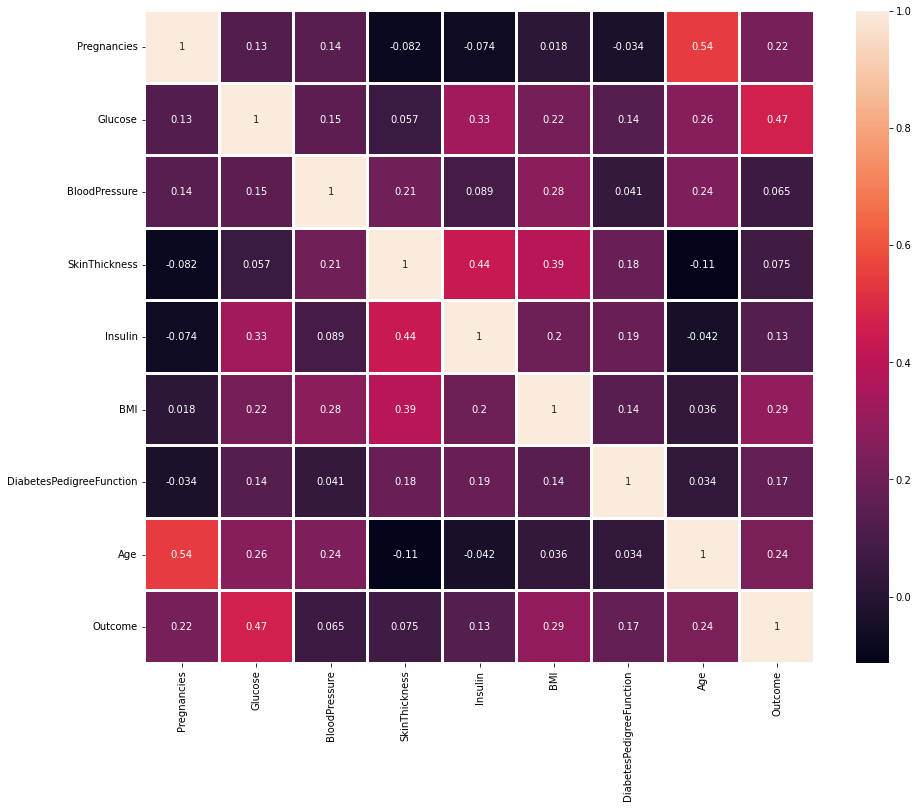

In [18]:
# for getting relation between features
plt.figure(figsize=(15, 12))
sns.heatmap(data.corr(), annot=True, linewidths=2)
plt.show()

In [21]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

Data before and After standardisation

In [28]:
# Before
a = data.drop(columns = 'Outcome', axis=1)    # Only features
b = data['Outcome']                           # Only outcomes
print("")                      
print("-----------------Data Representing only Features before Standardization-------------------")
print("")
print(a)
print("")
print("")
print("")
print("-----------------Data Representing only Outcomes before Standardization-------------------")
print("")
print(b)


-----------------Data Representing only Features before Standardization-------------------

     Pregnancies  Glucose  BloodPressure  ...   BMI  DiabetesPedigreeFunction  Age
0              6      148             72  ...  33.6                     0.627   50
1              1       85             66  ...  26.6                     0.351   31
2              8      183             64  ...  23.3                     0.672   32
3              1       89             66  ...  28.1                     0.167   21
4              0      137             40  ...  43.1                     2.288   33
..           ...      ...            ...  ...   ...                       ...  ...
763           10      101             76  ...  32.9                     0.171   63
764            2      122             70  ...  36.8                     0.340   27
765            5      121             72  ...  26.2                     0.245   30
766            1      126             60  ...  30.1                     0.349

In [30]:
# After Standardization
scaler = StandardScaler()
scaler.fit(a)
stnd_data = scaler.transform(a)
A = stnd_data                                 # whole dataset
B = data['Outcome']                           # only outcomes
print("")                      
print("-----------------Data Representing Outcomes + Features after Standardization-------------------")
print("")
print(A)
print("")
print("")
print("")
print("-----------------Data Representing only Outcomes after Standardization-------------------")
print("")
print(B)


-----------------Data Representing Outcomes + Features after Standardization-------------------

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]



-----------------Data Representing only Outcomes after Standardization-------------------

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Splitting dataset into Training and Test-Set

In [45]:
X_train, X_test, Y_train, Y_test = train_test_split(A,B, test_size = 0.2, stratify=B, random_state=2)

In [46]:
print(X_train.shape)
print(X_train)

(614, 8)
[[-1.14185152 -0.05929342 -3.57259724 ...  0.05170968 -0.9992857
  -0.78628618]
 [ 0.63994726 -0.49745345  0.04624525 ... -0.15136112 -1.05666795
   0.31985461]
 [-0.84488505  2.13150675 -0.47073225 ... -0.24020459 -0.2231152
   2.19178518]
 ...
 [ 2.12477957 -1.12339636  0.25303625 ... -0.24020459 -0.51908683
   0.14967911]
 [ 0.04601433 -0.27837344  0.45982725 ...  0.94014439 -0.71237443
   0.40494237]
 [-1.14185152 -1.09209922 -0.05715025 ...  0.48323511 -0.70633419
  -0.70119842]]


In [47]:
print(Y_train.shape)
print(Y_train)

(614,)
619    1
329    0
13     1
476    1
45     1
      ..
303    1
592    1
559    0
725    0
253    0
Name: Outcome, Length: 614, dtype: int64


In [48]:
print(X_test.shape)
print(X_test)

(154, 8)
[[-0.25095213 -0.46615631  0.14964075 ... -0.78595734 -0.79995787
  -0.53102292]
 [-0.25095213 -0.24707629 -1.29789624 ... -1.21748278 -1.00230582
  -0.95646168]
 [ 0.3429808   0.81702665  0.45982725 ...  0.2167047  -0.76673656
   2.7023117 ]
 ...
 [-0.54791859 -0.34096773  0.25303625 ...  0.05170968  0.6829204
  -0.53102292]
 [-0.54791859 -1.24858494  0.14964075 ... -0.24020459  0.22688248
  -0.70119842]
 [ 2.7187125  -0.46615631  0.14964075 ...  0.58477051 -0.88754131
   1.00055664]]


In [49]:
print(Y_test.shape)
print(Y_test)

(154,)
615    0
80     0
148    0
132    1
501    0
      ..
127    0
185    1
85     0
497    0
86     0
Name: Outcome, Length: 154, dtype: int64


Training datasets using SVM and KNN

In [58]:
# for displaying Confusion matrix
def displaying(y_test, y_prdct)->float:
  acc = accuracy_score(y_test, y_prdct)
  matrix = confusion_matrix(y_test, y_prdct)
  sns.heatmap(matrix, annot=True, fmt="d")
  plt.title(f"Accuracy: {acc:0.4f}")
  plt.xlabel("Predicted labels")
  plt.ylabel("Actual labels")
  plt.show()
  return acc

def classify(clsf, x_train=X_train, y_train=Y_train, x_test=X_test, y_test=Y_test)->float:
  clsf.fit(x_train, y_train)
  y_prdct = clsf.predict(x_test)
  acc = displaying(y_test, y_prdct)
  print(classification_report(y_test, y_prdct))
  return acc

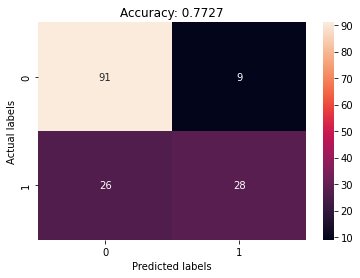

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       100
           1       0.76      0.52      0.62        54

    accuracy                           0.77       154
   macro avg       0.77      0.71      0.73       154
weighted avg       0.77      0.77      0.76       154



In [59]:
# Using Linear SVM as our classification model
model = SVC(kernel="linear", random_state=0)
model_acc = classify(model)

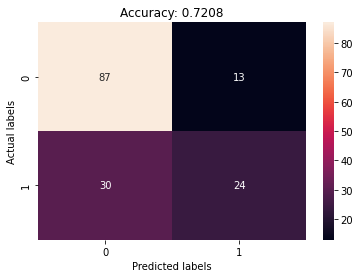

              precision    recall  f1-score   support

           0       0.74      0.87      0.80       100
           1       0.65      0.44      0.53        54

    accuracy                           0.72       154
   macro avg       0.70      0.66      0.66       154
weighted avg       0.71      0.72      0.71       154



In [65]:
# Using KNN as our classification model
model = KNeighborsClassifier(n_neighbors=5, metric="minkowski", p=2)
model_acc = classify(model)

Constructing a generalised Predecting System

In [67]:
# just predecting whether the person is diabetic or not
input = (6, 169, 69, 23, 169, 26.9, 0.690, 69)

data_array = np.asarray(input)                    # making numpy array
data_reshape = data_array.reshape(1, -1)          # data reshaping coz predecting for an instance

stnd_data = scaler.transform(data_reshape)             # standardising data
print(stnd_data)

# selecting SVM classifier
classifier = SVC(kernel='linear')
classifier.fit(X_train, Y_train)

prediction = classifier.predict(data)
print(prediction)

if(prediction[0]==0):
  print("Non-diabetic")
else:
  print("Diabetic")






[[ 0.63994726  1.50556385 -0.0054525   0.15453319  0.77451884 -0.64634617
   0.65875945  3.04266271]]
[1]
Diabetic


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
